<a href="https://colab.research.google.com/github/NagillaUdayasree/Udayasree_INFO5731_Spring2024/blob/main/Nagilla_Udayasree_Assignment_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [2]:
# Import necessary libraries: 'files' module for uploading files, 'pandas' for data manipulation, and 'io' for handling byte streams
from google.colab import files
import pandas as pd
import io

# Prompt the user to upload files from their local system. 'upload()' returns a dictionary of the files uploaded.
uploaded = files.upload()

# Extract the first filename from the iterable of uploaded files. This assumes there's at least one file uploaded.
filename = next(iter(uploaded))

# Read the uploaded CSV file into a pandas DataFrame.
# 'io.BytesIO(uploaded[filename])' converts the file (accessed by its name from the 'uploaded' dictionary) into a byte stream that pandas can read.
df = pd.read_csv(io.BytesIO(uploaded[filename]))


Saving Cleaned_data.csv to Cleaned_data.csv


In [3]:
from collections import Counter
# Defines a function to read CSV data from a file. This function opens a file for reading in text mode with UTF-8 encoding.
def read_csv(filename):
    reviews = []  # Initializes an empty list to store the reviews.
    with open(filename, 'r', encoding='utf-8') as file:  # Opens the file with the given filename.
        next(file)  # Skips the first line (header) of the CSV file.
        for line in file:  # Iterates over each line in the file.
            reviews.append(line.strip())  # Removes any leading/trailing whitespace and adds the line to the reviews list.
    return reviews  # Returns the list of reviews.

# Defines a function that takes a string of text and splits it into a list of words based on spaces.
def simple_tokenize(text):
    return text.split()

# Defines a function to generate trigrams from a list of tokens (words).
def generate_trigrams(tokens):
    # Creates a list of trigrams by joining each set of three consecutive words with a comma, using list comprehension.
    return [",".join(tokens[i:i+3]) for i in range(len(tokens)-2)]

# Defines a function to count the occurrences of each trigram in a list of trigrams.
def count_trigrams(trigrams):
    # Uses the Counter class to count the trigrams and returns a dictionary with trigrams as keys and their counts as values.
    return dict(Counter(trigrams))

# The main block of code that uses the defined functions to process a CSV file containing reviews.

# Specifies the path to the CSV file containing the reviews.
filename = 'Cleaned_data.csv'

# Reads reviews from the CSV file and concatenates them into a single string separated by spaces.
reviews = read_csv(filename)
all_reviews = ' '.join(reviews)

# Tokenizes the concatenated string of reviews into individual words.
tokens = simple_tokenize(all_reviews)

# Generates trigrams from the list of tokens.
trigrams = generate_trigrams(tokens)

# Counts the occurrences of each trigram in the list of trigrams.
trigram_counts = count_trigrams(trigrams)

# Uses the Counter class to sort the trigrams by their counts and prints the 20 most common trigrams and their counts.
for trigram, count in Counter(trigram_counts).most_common(20):
    print(f"{trigram}: {count}")


robbins,morgan,freeman: 84
tim,robbins,morgan: 77
best,movie,ever: 65
film,ever,made: 49
movie,ever,made: 48
rita,hayworth,shawshank: 47
hayworth,shawshank,redemption: 46
best,film,ever: 38
morgan,freeman,tim: 35
freeman,tim,robbins: 35
one,best,movie: 34
movie,ever,seen: 34
red,morgan,freeman: 32
murdering,wife,lover: 31
dufresne,tim,robbins: 30
best,movie,time: 30
one,best,film: 27
andy,dufresne,tim: 27
stephen,king,novella: 26
murder,wife,lover: 25


In [4]:
# Import necessary libraries
import csv  # For reading CSV files
from collections import defaultdict  # Provides a dictionary that defaults to zero for new keys
from itertools import islice # For slicing an iterable

# Function to load reviews from a CSV file, specifically ignoring the first column
def read_csv(filename):
    reviews = []  # Initialize an empty list to store the reviews
    # Open the CSV file for reading with the specified encoding
    with open(filename, 'r', encoding='utf-8') as file:
        csv_reader = csv.reader(file)  # Create a CSV reader object
        for row in csv_reader:  # Iterate over each row in the CSV
            if row:  # Check if the row is not empty
                reviews.append(row[1])  # Append the second column's value to the reviews list
    return reviews  # Return the list of reviews

# Function to calculate bigram probabilities from a list of reviews
def calculate_bigram_probabilities(reviews):
    # Initialize dictionaries to count unigrams and bigrams
    bigram_counts = defaultdict(int)
    unigram_counts = defaultdict(int)

    # Iterate over each review
    for review in reviews:
        tokens = review.split()  # Tokenize the review into words
        # Iterate over the tokens to count unigrams and bigrams
        for i in range(len(tokens) - 1):  # Loop over tokens except the last one
            unigram = tokens[i]  # Current word
            unigram_counts[unigram] += 1  # Increment count for the current word
            bigram = (tokens[i], tokens[i + 1])  # Create a bigram tuple
            bigram_counts[bigram] += 1  # Increment count for the current bigram

        # Special case: Add the count for the last token in each review
        if tokens:
            unigram_counts[tokens[-1]] += 1

    # Calculate the bigram probabilities: P(w2|w1) = count(w1, w2) / count(w1)
    bigram_probabilities = {bigram: count / unigram_counts[bigram[0]] for bigram, count in bigram_counts.items()}
    return bigram_probabilities  # Return the dictionary of bigram probabilities

# Main execution block
if __name__ == "__main__":
    # Specify the path to the CSV file
    filename = 'Cleaned_data.csv'

    # Load reviews from the CSV file
    reviews = read_csv(filename)

    # Calculate bigram probabilities from the loaded reviews
    bigram_probabilities = calculate_bigram_probabilities(reviews)

    # Print the first 20 bigram probabilities to the console
    # 'islice' is used to limit the output to the first 20 items
    for bigram, prob in islice(bigram_probabilities.items(), 20):
        # Format and print each bigram with its probability
        print(f"{bigram}: {prob:.3f}")



('shawshank', 'redemption'): 0.580
('redemption', 'written'): 0.003
('written', 'directed'): 0.143
('directed', 'frank'): 0.481
('frank', 'darabont'): 0.799
('darabont', 'adaptation'): 0.005
('adaptation', 'stephen'): 0.347
('stephen', 'king'): 0.991
('king', 'novella'): 0.096
('novella', 'rita'): 0.317
('rita', 'hayworth'): 0.909
('hayworth', 'shawshank'): 0.686
('redemption', 'starring'): 0.001
('starring', 'tim'): 0.643
('tim', 'robbins'): 0.944
('robbins', 'morgan'): 0.170
('morgan', 'freeman'): 0.944
('freeman', 'film'): 0.018
('film', 'portrays'): 0.000
('portrays', 'story'): 0.048


In [5]:
import pandas as pd  # Importing the pandas library for data manipulation
import spacy  # Importing the spaCy library for natural language processing
from collections import Counter  # Importing Counter from collections module to count occurrences of elements

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")  # Loading the English language model provided by spaCy

# Function to load the cleaned text data from a CSV file
def load_data(filename):
    return pd.read_csv(filename)  # Using pandas to read data from the CSV file and returning the DataFrame

# Function to extract noun phrases using spaCy
def extract_noun_phrases(text):
    doc = nlp(text)  # Applying spaCy's natural language processing pipeline to the text
    return [chunk.text for chunk in doc.noun_chunks]  # Extracting noun phrases from the processed text

# Analyze noun phrases across the first 100 documents and calculate relative frequencies
def analyze_noun_phrases(df, text_column, num_reviews=100):
    # Extract noun phrases for each document
    df['noun_phrases'] = df[text_column].apply(extract_noun_phrases)  # Applying the extract_noun_phrases function to each text in the specified column

    # Flatten the list of all noun phrases to calculate global frequency
    all_phrases = [phrase for sublist in df['noun_phrases'][:num_reviews].tolist() for phrase in sublist]  # Flattening the list of noun phrases
    total_phrase_freq = Counter(all_phrases)  # Counting the frequency of each noun phrase
    max_freq = max(total_phrase_freq.values())  # Getting the maximum frequency

    # Calculate relative frequency for each noun phrase
    relative_freqs = {phrase: freq / max_freq for phrase, freq in total_phrase_freq.items()}  # Calculating relative frequency of each noun phrase

    # Prepare the results DataFrame
    columns = ['document_id'] + list(relative_freqs.keys())  # Creating column names for the DataFrame
    results_df = pd.DataFrame(columns=columns)  # Creating an empty DataFrame with specified column names

    # Populate the DataFrame with relative frequencies per document
    for index, row in df.head(num_reviews).iterrows():  # Looping through the first 'num_reviews' rows of the DataFrame
        document_id = row['document_id']  # Getting the document ID
        document_phrases = row['noun_phrases']  # Getting the noun phrases for the current document
        document_freqs = {phrase: document_phrases.count(phrase) / max_freq for phrase in relative_freqs}  # Calculating relative frequency for each noun phrase in the current document
        document_freqs['document_id'] = document_id  # Adding the document ID to the frequencies dictionary
        results_df = pd.concat([results_df, pd.DataFrame([document_freqs])], ignore_index=True)  # Appending the frequencies for the current document to the results DataFrame

    return results_df  # Returning the DataFrame containing relative frequencies of noun phrases for each document


filename = 'Cleaned_data.csv'  # Path to the CSV file containing the data
df = load_data(filename)  # Loading the data into a DataFrame

# Ensure 'document_id' and 'clean_text' are the correct column names in your CSV
new_column_names = ['document_id', 'clean_text']  # Specifying the column names
df.columns = new_column_names  # Assigning new column names to the DataFrame

# Analyze noun phrases and calculate relative frequencies for only the first 100 reviews
result_df = analyze_noun_phrases(df, 'clean_text', num_reviews=100)  # Calling the analyze_noun_phrases function

# Display the result table
print(result_df)  # Printing the DataFrame containing the relative frequencies of noun phrases

# Optionally, saved the result to a new CSV file for further analysis or use
result_df.to_csv('noun_phrase_relative_frequencies_100_reviews.csv', index=False)  # Saving the DataFrame to a CSV file


   document_id  film high rating  much story acting premise movie      feel  \
0            1          0.027027                         0.027027  0.027027   
1            2          0.000000                         0.000000  0.000000   
2            3          0.000000                         0.000000  0.000000   
3            4          0.000000                         0.000000  0.000000   
4            5          0.000000                         0.000000  0.000000   
..         ...               ...                              ...       ...   
95          96          0.000000                         0.000000  0.000000   
96          97          0.000000                         0.000000  0.000000   
97          98          0.000000                         0.000000  0.000000   
98          99          0.000000                         0.000000  0.000000   
99         100          0.000000                         0.000000  0.000000   

        film       you  forgetthe  ultimate story f

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [6]:
import math

# Function to read documents from a CSV file
def read_documents_from_csv(file_path):
    documents = []
    # Open the CSV file in read mode
    with open(file_path, 'r', encoding='utf-8') as csvfile:
        # Iterate through each line in the file
        for line in csvfile:
            # Strip leading/trailing whitespace and split the line into words
            documents.append(line.strip().split())
    return documents

# Function to calculate term frequency for a document
def calculate_term_frequency(document):
    term_frequency_scores = {}
    # Count the total number of words in the document
    word_count = len(document)
    # Iterate through each word in the document
    for word in document:
        # Calculate the term frequency for each word
        term_frequency_scores[word] = term_frequency_scores.get(word, 0) + 1 / word_count
    return term_frequency_scores

# Function to calculate inverse document frequency for all documents
def calculate_inverse_document_frequency(documents):
    inverse_document_frequency_scores = {}
    # Get the total number of documents
    total_documents = len(documents)

    # Dictionary to store document frequency of each word
    document_frequency = {}
    # Iterate through each document in the corpus
    for document in documents:
        # Iterate through each unique word in the document
        for word in set(document):
            # Increment the document frequency count for each word
            document_frequency[word] = document_frequency.get(word, 0) + 1

    # Iterate through each word and compute its inverse document frequency
    for word, count in document_frequency.items():
        inverse_document_frequency_scores[word] = math.log(total_documents / count)

    return inverse_document_frequency_scores

# Function to calculate TF-IDF scores for all documents
def calculate_tfidf(term_frequency_scores, inverse_document_frequency_scores):
    tfidf_scores = []
    # Iterate through each document's term frequency scores
    for document_tf in term_frequency_scores:
        document_tfidf = {}
        # Multiply term frequency by inverse document frequency for each word
        for word, tf in document_tf.items():
            document_tfidf[word] = tf * inverse_document_frequency_scores.get(word, 0)
        # Append the TF-IDF scores for the document to the list
        tfidf_scores.append(document_tfidf)
    return tfidf_scores

# Main code block
file_path = 'Cleaned_data.csv'
# Read documents from the CSV file
documents = read_documents_from_csv(file_path)

# Calculate term frequency scores for each document
term_frequency_scores = [calculate_term_frequency(doc) for doc in documents]
# Calculate inverse document frequency scores for all documents
inverse_document_frequency_scores = calculate_inverse_document_frequency(documents)
# Calculate TF-IDF scores for all documents
tfidf_scores = calculate_tfidf(term_frequency_scores, inverse_document_frequency_scores)

# Create a comprehensive list of all terms
all_terms = sorted(list(inverse_document_frequency_scores.keys()))

# Initialize the TF-IDF matrix
tfidf_matrix = []

# Populate the TF-IDF matrix
for document_scores in tfidf_scores:
    document_vector = [document_scores.get(term, 0) for term in all_terms]
    tfidf_matrix.append(document_vector)

# Print the TF-IDF matrix
for row in tfidf_matrix[:10]:
    print(["{:.3f}".format(score) for score in row])


['0.020', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', 

In [7]:
def read_documents_from_csv(filename):
    """
    Function to read documents from a CSV file.
    """
    documents = []
    with open(filename, 'r', encoding='utf-8') as file:
        # Iterate through each line in the file
        for line in file:
            # Append the line to the documents list after stripping any leading/trailing whitespace
            documents.append(line.strip())
    return documents

def preprocess(text):
    """
    Function to preprocess text by converting it to lowercase and splitting it into words.
    """
    return text.lower().split()

def create_vocabulary(documents, query):
    """
    Function to create a vocabulary set from documents and a query.
    """
    # Initialize an empty set to store unique words
    vocabulary = set(preprocess(query))
    # Iterate through each document in the documents list
    for document in documents:
        # Update the vocabulary set with the words from the preprocessed document
        vocabulary.update(preprocess(document))
    return list(vocabulary)

def vectorize(text, vocabulary):
    """
    Function to convert text into a vector representation based on a given vocabulary.
    """
    # Preprocess the text
    words = preprocess(text)
    # Initialize a vector with zeros, with length equal to the vocabulary size
    vector = [0] * len(vocabulary)
    # Iterate through each word in the preprocessed text
    for word in words:
        # Check if the word is in the vocabulary
        if word in vocabulary:
            # Increment the corresponding index in the vector
            vector[vocabulary.index(word)] += 1
    return vector

def dot_product(vec1, vec2):
    """
    Function to compute the dot product of two vectors.
    """
    # Compute the dot product using a list comprehension
    return sum(a * b for a, b in zip(vec1, vec2))

def magnitude(vec):
    """
    Function to compute the magnitude of a vector.
    """
    # Compute the magnitude using the sum of squares and square root
    return sum(a ** 2 for a in vec) ** 0.5

def cosine_similarity(vec1, vec2):
    """
    Function to compute the cosine similarity between two vectors.
    """
    # Compute the dot product of the vectors
    dot_prod = dot_product(vec1, vec2)
    # Compute the magnitudes of the vectors
    mag1 = magnitude(vec1)
    mag2 = magnitude(vec2)
    # Handle edge cases where magnitudes are zero
    if not mag1 or not mag2:
        return 0
    # Compute and return the cosine similarity
    return dot_prod / (mag1 * mag2)

def rank_documents(filename, query):
    """
    Function to rank documents based on cosine similarity to a query.
    """
    # Read documents from the CSV file
    documents = read_documents_from_csv(filename)
    # Create vocabulary from documents and query
    vocabulary = create_vocabulary(documents, query)
    # Vectorize the query
    query_vector = vectorize(query, vocabulary)
    # Vectorize each document
    document_vectors = [vectorize(doc, vocabulary) for doc in documents]

    # Calculate cosine similarity between query vector and document vectors
    similarities = [cosine_similarity(query_vector, doc_vec) for doc_vec in document_vectors]

    # Rank documents based on cosine similarity
    ranked_docs = sorted(zip(documents, similarities), key=lambda x: x[1], reverse=True)

    # Print top ranked documents and their similarity scores
    print("Top ranked documents based on cosine similarity to the query:")
    for doc, similarity in ranked_docs[:20]:  # Limit to top 20 outputs
        print(f"Similarity: {similarity:.3f}, Document: {doc}")


# Example usage
query = "The Shawshank Redemption is an enduring masterpiece, seamlessly weaving together powerful performances, captivating storytelling, and profound themes of hope and redemption into a cinematic triumph."
filename = 'Cleaned_data.csv'  # Path to CSV file

# Rank documents based on cosine similarity to the query
rank_documents(filename, query)


Top ranked documents based on cosine similarity to the query:
Similarity: 0.249, Document: 162,timeless tale hope resilience remains deeply impactful day set within confines shawshank state penitentiary film intricately weave narrative human spirit triumph adversity enduring power hope tim robbins morgan freeman deliver captivating performance infusing life character making journey truly unforgettable skilled direction frank darabont film storytelling unfolds seamlessly drawing audience world despair redemption exploration friendship injustice pursuit freedom shawshank redemption resonates audience worldwide leaving profound emotional impression lingers long credit roll
Similarity: 0.244, Document: 930,shawshank redemption cinematic gem transcends time genre leaving indelible mark world film directed frank darabont based stephen king novella classic masterclass storytelling character development enduring power hopeset within bleak wall shawshank state penitentiary film follows journey 

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

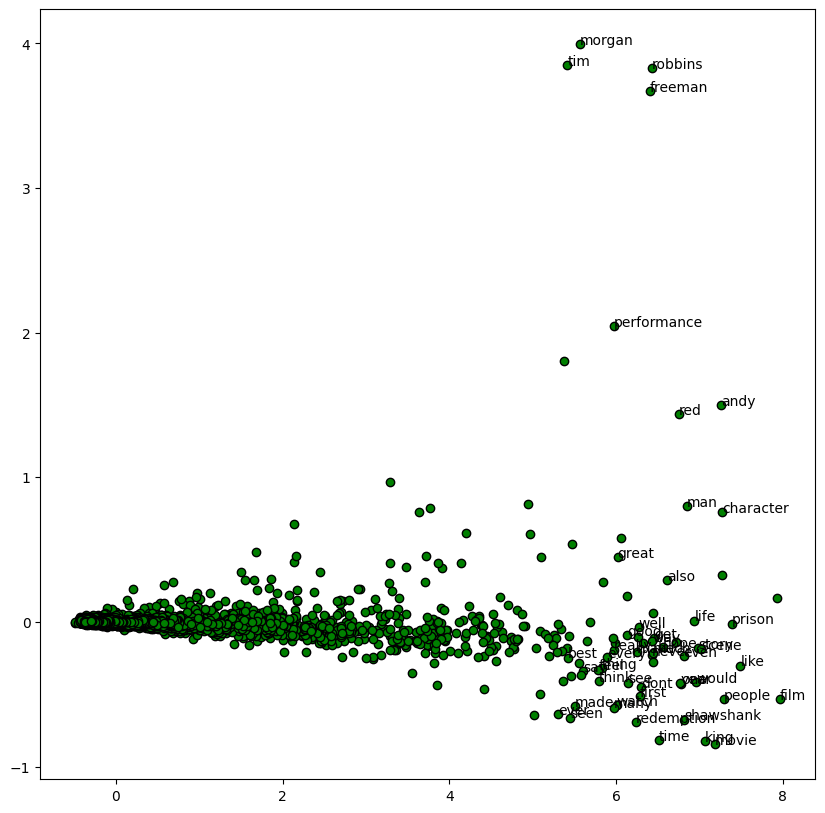

In [8]:
import pandas as pd
from gensim.models import Word2Vec
!pip install matplotlib scikit-learn  # Install necessary libraries

# Load preprocessed text data from CSV, assuming no header
df = pd.read_csv('Cleaned_data.csv', header=None)

# text data starts from the second column (index 1)
# Ensure every entry is treated as a string and split it into words
documents = [str(text).split() for text in df[1]]  # Now using the second column for text data

# Train a Word2Vec model
model_w2v = Word2Vec(documents, vector_size=300, window=5, min_count=1, workers=4)  # Train Word2Vec model with specified parameters
model_w2v.save("word2vec_300d.model")  # Save the trained Word2Vec model

import matplotlib.pyplot as plt  # Import matplotlib for visualization
from sklearn.decomposition import PCA  # Import PCA for dimensionality reduction
from gensim.models import Word2Vec  # Import Word2Vec model

# Extract all word vectors from the trained model
word_vectors = model_w2v.wv.vectors

# Perform PCA to transform the word vectors into 2D
pca = PCA(n_components=2)  # Initialize PCA with 2 components for 2D visualization
word_vectors_2d = pca.fit_transform(word_vectors)  # Fit PCA to word vectors and transform them to 2D

# Plot the 2D word vectors using matplotlib
plt.figure(figsize=(10, 10))  # Set the figure size
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], edgecolors='k', c='g')  # Scatter plot of word vectors

# Annotate some words to see their relative positions
words = list(model_w2v.wv.index_to_key)  # Get list of words in the vocabulary
for i, word in enumerate(words[:50]):  # Loop through the first 50 words
    plt.text(word_vectors_2d[i, 0], word_vectors_2d[i, 1], word)  # Annotate each word with its position

plt.show()  # Show the plot




## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [9]:
# The GitHub link of your final csv file


# Link:https://github.com/NagillaUdayasree/Udayasree_INFO5731_Spring2024/blob/main/classified_sentiment_output.csv










# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
"""The assignment instructions were straightforward and comprehensible, making it easy to grasp the requirements. While the task of writing code without relying on existing libraries posed some challenge, it was manageable to produce the desired output."""